In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Results folder:
ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\"

In [2]:
load_folder = 'C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\'
peakLoad = pd.read_excel(load_folder + 'Peakload.xlsx')
load = pd.read_excel(load_folder + 'load.xlsx')
load = load.sort_values(by=['building id'])
load = load.reset_index()
load = load.drop(['index'], axis=1)
peakLoad['Load'] = load['Load']
peakLoad['Load Factor'] = peakLoad['Load']/(peakLoad['Peak Load']*8760)
peakLoad = peakLoad.drop(['Unnamed: 0'], axis=1)

peakLoad['MgSO4 Salt Mass E'] = peakLoad['Peak Load']/0.75
peakLoad['MgSO4 Salt Mass P'] = peakLoad['Peak Load']/0.281267306
peakLoad['MgSO4 Salt Mass'] = peakLoad[['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E'], axis=1)

peakLoad['MgCl2 Salt Mass E'] = peakLoad['Peak Load']/0.193056
peakLoad['MgCl2 Salt Mass P'] = peakLoad['Peak Load']/0.084767892
peakLoad['MgCl2 Salt Mass'] = peakLoad[['MgCl2 Salt Mass P', 'MgCl2 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['MgCl2 Salt Mass P', 'MgCl2 Salt Mass E'], axis=1)

peakLoad['K2CO3 Salt Mass E'] = peakLoad['Peak Load']/0.186111
peakLoad['K2CO3 Salt Mass P'] = peakLoad['Peak Load']/1.646738256
peakLoad['K2CO3 Salt Mass'] = peakLoad[['K2CO3 Salt Mass P', 'K2CO3 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['K2CO3 Salt Mass P', 'K2CO3 Salt Mass E'], axis=1)

peakLoad['SrBr2 Salt Mass E'] = peakLoad['Peak Load']/0.3556
peakLoad['SrBr2 Salt Mass P'] = peakLoad['Peak Load']/0.811253581
peakLoad['SrBr2 Salt Mass'] = peakLoad[['SrBr2 Salt Mass P', 'SrBr2 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['SrBr2 Salt Mass P', 'SrBr2 Salt Mass E'], axis=1)

peakLoad

,building id,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass
0,1,27.724174,58015.584978,0.238881,98.568777,327.059854,148.965802,77.964495
1,2,20.164945,41411.346548,0.234433,71.693170,237.884232,108.349022,56.706819
2,3,18.771555,36953.435376,0.224725,66.739200,221.446522,100.862146,52.788400
3,4,16.617412,31673.736508,0.217586,59.080496,196.034272,89.287640,46.730630
4,5,27.902137,59150.390389,0.242000,99.201496,329.159269,149.922022,78.464953
...,...,...,...,...,...,...,...,...
395,396,12.189566,23415.204886,0.219283,43.338012,143.799328,65.496214,34.278869
396,397,12.662940,24918.728631,0.224640,45.021018,149.383689,68.039720,35.610069
397,398,4.833286,7854.976581,0.185523,17.183958,57.017881,25.969908,13.591917
398,399,14.577960,28841.437895,0.225848,51.829559,171.975025,78.329386,40.995389


In [3]:
rate = 'Fixed_Rate'
size = 'Opt_Size'

In [4]:
# Total costs:
cost_noTES = pd.read_excel(ResultsFolder + 'costs_noTES_' + rate +'.xlsx')
cost_MgSO4 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_MgSO4'+'.xlsx')
cost_MgCl2 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_MgCl2'+'.xlsx')
cost_K2CO3 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_K2CO3'+'.xlsx')
cost_SrBr2 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_SrBr2'+'.xlsx')

# Clean up:
cost_noTES = cost_noTES.rename(columns={'Unnamed: 0': 'building id'})
cost_noTES = cost_noTES.sort_values(by=['building id'])
cost_noTES = cost_noTES.reset_index()
cost_noTES = cost_noTES[['building id', 'total cost ($)']]

cost_MgSO4 = cost_MgSO4.rename(columns={'Unnamed: 0': 'building id'})
cost_MgSO4 = cost_MgSO4.sort_values(by=['building id'])
cost_MgSO4 = cost_MgSO4.reset_index()
cost_MgSO4 = cost_MgSO4[['building id', 'total cost ($)']]

cost_MgCl2 = cost_MgCl2.rename(columns={'Unnamed: 0': 'building id'})
cost_MgCl2 = cost_MgCl2.sort_values(by=['building id'])
cost_MgCl2 = cost_MgCl2.reset_index()
cost_MgCl2 = cost_MgCl2[['building id', 'total cost ($)']]

cost_K2CO3 = cost_K2CO3.rename(columns={'Unnamed: 0': 'building id'})
cost_K2CO3 = cost_K2CO3.sort_values(by=['building id'])
cost_K2CO3 = cost_K2CO3.reset_index()
cost_K2CO3 = cost_K2CO3[['building id', 'total cost ($)']]

cost_SrBr2 = cost_SrBr2.rename(columns={'Unnamed: 0': 'building id'})
cost_SrBr2 = cost_SrBr2.sort_values(by=['building id'])
cost_SrBr2 = cost_SrBr2.reset_index()
cost_SrBr2 = cost_SrBr2[['building id', 'total cost ($)']]

# Find changes in total costs:
cost_impacts_TES = pd.DataFrame()
cost_impacts_TES['building id'] = cost_noTES['building id']
cost_impacts_TES['total cost - no TES'] = cost_noTES['total cost ($)']
cost_impacts_TES['total cost - MgSO4'] = cost_MgSO4['total cost ($)']
cost_impacts_TES['total cost - MgCl2'] = cost_MgCl2['total cost ($)']
cost_impacts_TES['total cost - K2CO3'] = cost_K2CO3['total cost ($)']
cost_impacts_TES['total cost - SrBr2'] = cost_SrBr2['total cost ($)']

cost_impacts_TES['cost saving - MgSO4'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - MgSO4']
cost_impacts_TES['cost saving % - MgSO4'] = cost_impacts_TES['cost saving - MgSO4']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - MgCl2'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - MgCl2']
cost_impacts_TES['cost saving % - MgCl2'] = cost_impacts_TES['cost saving - MgCl2']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - K2CO3'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - K2CO3']
cost_impacts_TES['cost saving % - K2CO3'] = cost_impacts_TES['cost saving - K2CO3']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - SrBr2'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - SrBr2']
cost_impacts_TES['cost saving % - SrBr2'] = cost_impacts_TES['cost saving - SrBr2']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES
#cost_impacts_TES.to_excel("C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\cost_saving.xlsx")

,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,cost saving % - MgCl2,cost saving - K2CO3,cost saving % - K2CO3,cost saving - SrBr2,cost saving % - SrBr2
0,1,3514.231069,3475.829311,3486.128691,3460.242575,3485.537296,38.401758,0.010927,28.102377,0.007997,53.988493,0.015363,28.693773,0.008165
1,2,2511.596303,2483.235559,2490.779456,2471.836703,2490.343779,28.360744,0.011292,20.816847,0.008288,39.759601,0.015830,21.252524,0.008462
2,3,2237.074823,2161.403135,2170.590519,2200.545546,2217.531001,75.671688,0.033826,66.484304,0.029719,36.529277,0.016329,19.543822,0.008736
3,4,1925.335907,1902.180654,1908.330136,1892.924702,1907.964527,23.155253,0.012027,17.005771,0.008833,32.411205,0.016834,17.371380,0.009023
4,5,3573.233625,3535.107270,3473.258017,3519.561227,3544.752200,38.126355,0.010670,99.975607,0.027979,53.672398,0.015021,28.481424,0.007971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,1434.170366,1417.350513,1421.893617,1410.497173,1421.634267,16.819853,0.011728,12.276749,0.008560,23.673193,0.016507,12.536099,0.008741
396,397,1533.937770,1517.149523,1490.994360,1510.389002,1521.416289,16.788247,0.010945,42.943411,0.027996,23.548769,0.015352,12.521482,0.008163
397,398,490.001956,483.812217,474.128171,481.359239,485.346088,6.189739,0.012632,15.873785,0.032395,8.642717,0.017638,4.655868,0.009502
398,399,1759.523207,1739.580822,1744.933192,1731.467689,1744.624015,19.942385,0.011334,14.590015,0.008292,28.055518,0.015945,14.899192,0.008468


In [5]:
# Calc total cost saving saving due to TES:
tot_cost_noTES = cost_impacts_TES['total cost - no TES'].sum()*10000
diff_all_cost_MgSO4 = cost_impacts_TES["cost saving - MgSO4"].sum()*10000
diff_all_cost_MgCl2 = cost_impacts_TES["cost saving - MgCl2"].sum()*10000
diff_all_cost_K2CO3 = cost_impacts_TES["cost saving - K2CO3"].sum()*10000
diff_all_cost_SrBr2 = cost_impacts_TES["cost saving - SrBr2"].sum()*10000

pct_cost_saving_MgSO4 = diff_all_cost_MgSO4/tot_cost_noTES
pct_cost_saving_MgCl2 = diff_all_cost_MgCl2/tot_cost_noTES
pct_cost_saving_K2CO3 = diff_all_cost_K2CO3/tot_cost_noTES
pct_cost_saving_SrBr2 = diff_all_cost_SrBr2/tot_cost_noTES

cost_impacts_TES = pd.merge(cost_impacts_TES, peakLoad, on=["building id"])
#cost_impacts_TES["cost saving %"] = cost_impacts_TES["cost saving %"]*3.9

cost_impacts_TES['saving per kg - MgSO4'] = cost_impacts_TES['cost saving - MgSO4']/cost_impacts_TES['MgSO4 Salt Mass']
cost_impacts_TES['saving per kg - MgCl2'] = cost_impacts_TES['cost saving - MgCl2']/cost_impacts_TES['MgCl2 Salt Mass']
cost_impacts_TES['saving per kg - K2CO3'] = cost_impacts_TES['cost saving - K2CO3']/cost_impacts_TES['K2CO3 Salt Mass']
cost_impacts_TES['saving per kg - SrBr2'] = cost_impacts_TES['cost saving - SrBr2']/cost_impacts_TES['SrBr2 Salt Mass']

cost_impacts_TES

,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,cost saving % - MgCl2,...,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass,saving per kg - MgSO4,saving per kg - MgCl2,saving per kg - K2CO3,saving per kg - SrBr2
0,1,3514.231069,3475.829311,3486.128691,3460.242575,3485.537296,38.401758,0.010927,28.102377,0.007997,...,58015.584978,0.238881,98.568777,327.059854,148.965802,77.964495,0.389594,0.085924,0.362422,0.368036
1,2,2511.596303,2483.235559,2490.779456,2471.836703,2490.343779,28.360744,0.011292,20.816847,0.008288,...,41411.346548,0.234433,71.693170,237.884232,108.349022,56.706819,0.395585,0.087508,0.366959,0.374779
2,3,2237.074823,2161.403135,2170.590519,2200.545546,2217.531001,75.671688,0.033826,66.484304,0.029719,...,36953.435376,0.224725,66.739200,221.446522,100.862146,52.788400,1.133842,0.300227,0.362170,0.370229
3,4,1925.335907,1902.180654,1908.330136,1892.924702,1907.964527,23.155253,0.012027,17.005771,0.008833,...,31673.736508,0.217586,59.080496,196.034272,89.287640,46.730630,0.391927,0.086749,0.362998,0.371734
4,5,3573.233625,3535.107270,3473.258017,3519.561227,3544.752200,38.126355,0.010670,99.975607,0.027979,...,59150.390389,0.242000,99.201496,329.159269,149.922022,78.464953,0.384332,0.303730,0.358002,0.362983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,1434.170366,1417.350513,1421.893617,1410.497173,1421.634267,16.819853,0.011728,12.276749,0.008560,...,23415.204886,0.219283,43.338012,143.799328,65.496214,34.278869,0.388109,0.085374,0.361444,0.365709
396,397,1533.937770,1517.149523,1490.994360,1510.389002,1521.416289,16.788247,0.010945,42.943411,0.027996,...,24918.728631,0.224640,45.021018,149.383689,68.039720,35.610069,0.372898,0.287471,0.346103,0.351628
397,398,490.001956,483.812217,474.128171,481.359239,485.346088,6.189739,0.012632,15.873785,0.032395,...,7854.976581,0.185523,17.183958,57.017881,25.969908,13.591917,0.360205,0.278400,0.332797,0.342547
398,399,1759.523207,1739.580822,1744.933192,1731.467689,1744.624015,19.942385,0.011334,14.590015,0.008292,...,28841.437895,0.225848,51.829559,171.975025,78.329386,40.995389,0.384769,0.084838,0.358174,0.363436


(0.0, 400.0)

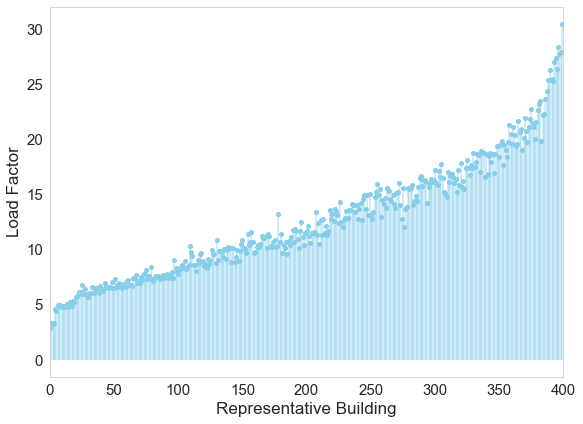

In [16]:
# Graph cost saving due to TES - MgSO4:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_cost = cost_impacts_TES.sort_values(by='Load')
#ordered_cost = cost_impacts_TES.sort_values(by='Peak Load')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['Peak Load'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Load Factor", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(0,0.3)
plt.xlim(0,400)


(0.0, 400.0)

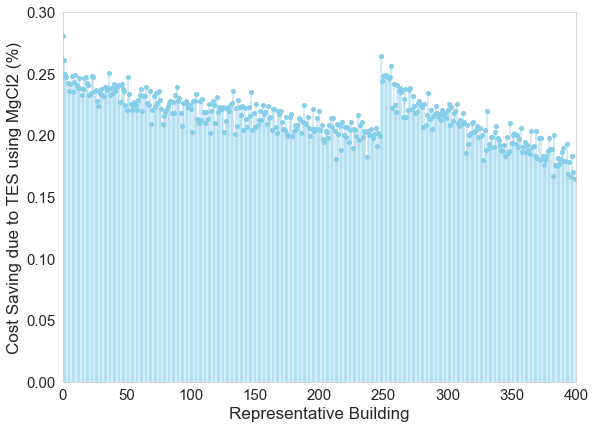

In [10]:
# Graph cost saving due to TES - MgCl2:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - MgCl2')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['Load Factor'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving due to TES using MgCl2 (%)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,0.3)
plt.xlim(0,400)


(0.0, 400.0)

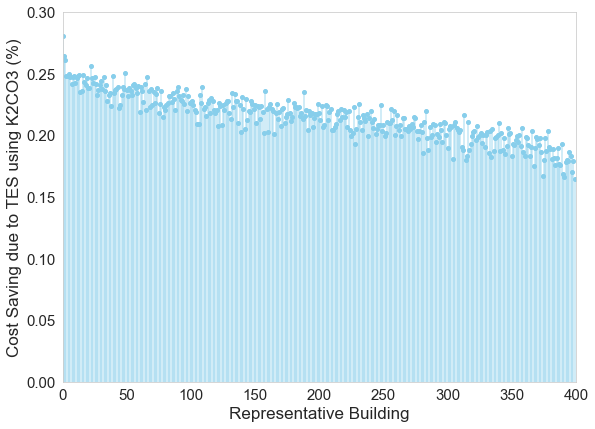

In [11]:
# Graph cost saving due to TES - K2CO3:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - K2CO3')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['Load Factor'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving due to TES using K2CO3 (%)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,0.3)
plt.xlim(0,400)

(0.0, 400.0)

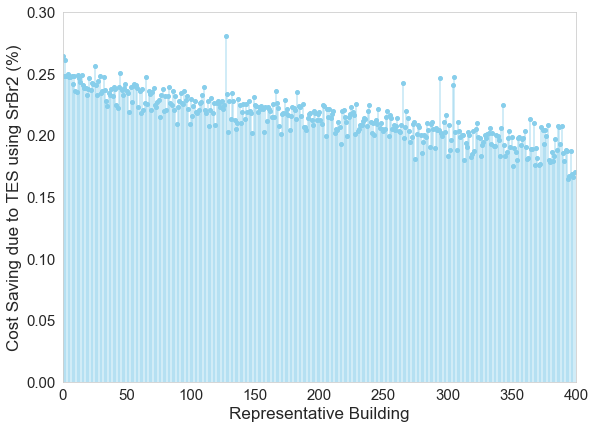

In [12]:
# Graph cost saving due to TES - SrBr2:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - SrBr2')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['Load Factor'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving due to TES using SrBr2 (%)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,0.3)
plt.xlim(0,400)